In [1]:
import numpy as np
import pygimli as pg
#import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle
import matplotlib.colors as mcolors
from pygimli.viewer import pv
import pyvista

In [2]:
dir='//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/'

In [3]:
data = ert.load(dir+"res2dinv_inputs/ERT_eastern_perpendicular_gps.dat")
data.save(dir + '3dmod/example.ohm', 'a b m n')

24/02/25 - 10:37:28 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


1

In [4]:
#plc = mt.createGrid(start=[0, -150, 0], end=[235, 150, -90], pos=[140, -140, -140], boundaryMarker=1)
dx = 5
dy = 5
dz = 5
x = np.arange(0, 240, dx)
y = np.arange(0, 305, dy)
z = np.arange(0, 155, dz)
grid = pg.createGrid(x, y, z)
print(grid)

Mesh: Nodes: 90768 Cells: 84600 Boundaries: 259830


In [7]:
shm = ert.load(dir + '3dmod/example2.ohm')



In [5]:
for c in grid.cells():
    if (c.center().y() <= 130 and c.center().z() >= 130) or (c.center().y() >= 170 and c.center().z() >= 130):
        c.setMarker(1)
    else:
        c.setMarker(2)
...
pg.show(grid, alpha=0.5)


Widget(value='<iframe src="http://localhost:61659/index.html?ui=P_0x21e202d45d0_0&reconnect=auto" class="pyvis…

(<pyvista.plotting.plotter.Plotter at 0x21e202d45d0>, None)

24/02/25 - 10:38:54 - pyGIMLi - INFO - Save RVector binary
24/02/25 - 10:38:54 - pyGIMLi - INFO - Cache stored: C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\4611119354365489944


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x21ec639c9d0>)

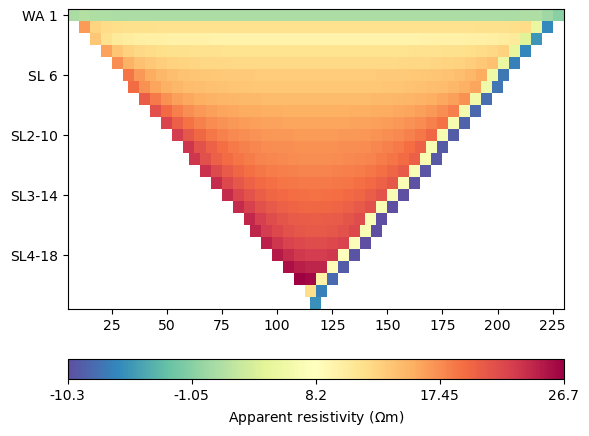

In [8]:
res_air = [[1, 1000.0], [2, 10.0]]

air_wide = ert.simulate(grid, res=res_air, scheme=shm, sr=False,
                   calcOnly=True, verbose=True)


air_wide['k'] = ert.createGeometricFactors(air_wide)
air_wide['rhoa'] = (air_wide['u']/air_wide['i'])*air_wide['k'] 
air_wide['err'] = ert.estimateError(air_wide, relativeError=0.003, absoluteUError=5e-5)
air_wide.save(dir + '3dmod/air_wide.ohm', 'a b m n k rhoa u i')

ert.showData(air_wide)

In [9]:
for c in grid.cells():
    if (c.center().y() <= 100 and c.center().z() >= 140) or (c.center().y() >= 200 and c.center().z() >= 140):
        c.setMarker(1)
    else:
        c.setMarker(2)
...
pg.show(grid, alpha=0.5)

Widget(value='<iframe src="http://localhost:61659/index.html?ui=P_0x21e57f36dd0_1&reconnect=auto" class="pyvis…

(<pyvista.plotting.plotter.Plotter at 0x21e57f36dd0>, None)

In [10]:
for c in grid.cells():
    if (c.center().y() <= 50 and c.center().z() >= 140) or (c.center().y() >= 250 and c.center().z() >= 140):
        c.setMarker(1)
    else:
        c.setMarker(2)
...
pg.show(grid, alpha=0.5)

Widget(value='<iframe src="http://localhost:61659/index.html?ui=P_0x21ec69cb790_2&reconnect=auto" class="pyvis…

(<pyvista.plotting.plotter.Plotter at 0x21ec69cb790>, None)

In [11]:
shm = ert.load(dir + '3dmod/example.ohm')
plc = mt.createCube(start=[0, -150, -90], end=[235, 150, 0], pos=[100, 0, -25], boundaryMarker=1)

for s in shm.sensors():
    plc.createNode(s, marker=-99)

for s in plc.positions(pg.find(plc.nodeMarkers() == -99)):
    plc.createNode(s - [1, 0.0, 0.0])
    
air1 = mt.createCube(start=[0, -150, -10], end=[235, -20, 0], pos=[230, -110, -2], marker=2)
air2 = mt.createCube(start=[0, 20, -10], end=[235, 150, 0], pos=[230, 110, -2], marker=2)

air3 = mt.createCube(start=[0, -150, -10], end=[235, -50, 0], pos=[230, -110, -2], marker=2)
air4 = mt.createCube(start=[0, 50, -10], end=[235, 150, 0], pos=[230, 110, -2], marker=2)

air5 = mt.createCube(start=[0, -150, 0], end=[235, -100, -10], pos=[230, -110, -2], marker=2)
air6 = mt.createCube(start=[0, 100, 0], end=[235, 150, -10], pos=[230, 110, -2], marker=2)

#air1.addRegionMarker([230, -110, -5], marker=2)  
#air2.addRegionMarker([230, 110, -5], marker=2) 

plc_wide = plc + air1 + air2
plc_mid = plc + air3 + air4
plc_thin = plc + air5 + air6

mesh_air_thin = mt.createMesh(plc_thin)
mesh_air_mid = mt.createMesh(plc_mid)
mesh_air_wide = mt.createMesh(plc_wide)
mesh_hom = mt.createMesh(plc)

mesh_air_thin.exportVTK(dir + '3dmod/mesh_air_thin')
mesh_air_mid.exportVTK(dir + '3dmod/mesh_air_mid')
mesh_air_wide.exportVTK(dir + '3dmod/mesh_air_wide')
mesh_hom.exportVTK(dir + '3dmod/mesh_hom')

ax, _ = pg.show(mesh_air_mid, alpha=0.5, showMesh=True)

Widget(value='<iframe src="http://localhost:61659/index.html?ui=P_0x21ec6aa90d0_3&reconnect=auto" class="pyvis…

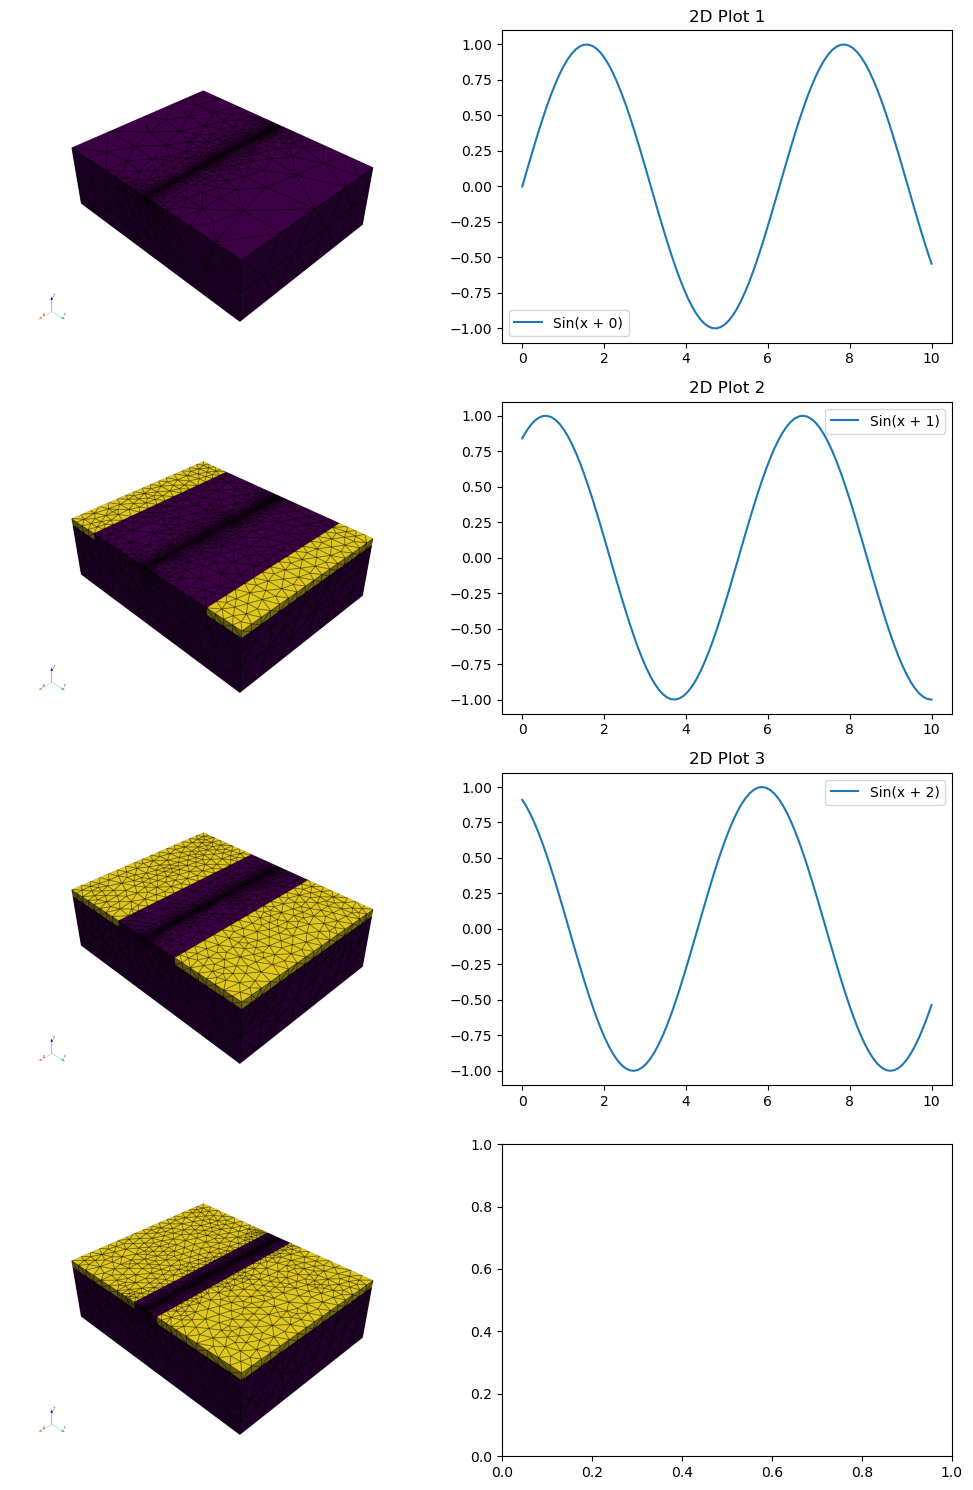

In [12]:
def render_vtk_to_image(filepath):

    mesh = pyvista.read(filepath)
    plotter = pyvista.Plotter(off_screen=True)
    plotter.add_mesh(mesh, show_scalar_bar=False, show_edges=True)
 
    plotter.set_background("white")
    plotter.show_axes()  
    img = plotter.screenshot(transparent_background=True)
    plotter.close()
    return img


vtk_files = [dir + '3dmod/mesh_hom.vtk', dir + '3dmod/mesh_air_thin.vtk', dir + '3dmod/mesh_air_mid.vtk', dir + '3dmod/mesh_air_wide.vtk']  # Replace with your actual VTK file paths

# Create a Matplotlib figure with 3x2 grid
fig, axs = plt.subplots(4, 2, figsize=(10, 15))

# Display VTK files in the left column
for i, filepath in enumerate(vtk_files):
    # Get the rendered image from PyVista
    img = render_vtk_to_image(filepath)
    # Display the image on the Matplotlib subplot
    axs[i, 0].imshow(img)
    axs[i, 0].axis('off')  # Hide axes for VTK images

# Generate 2D plots in the right column
x = np.linspace(0, 10, 100)
for i in range(3):
    axs[i, 1].plot(x, np.sin(x + i), label=f'Sin(x + {i})')
    axs[i, 1].set_title(f'2D Plot {i + 1}')
    axs[i, 1].legend()

# Adjust layout and show the figure
plt.tight_layout()
plt.show()

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x21ec6c77f50>)

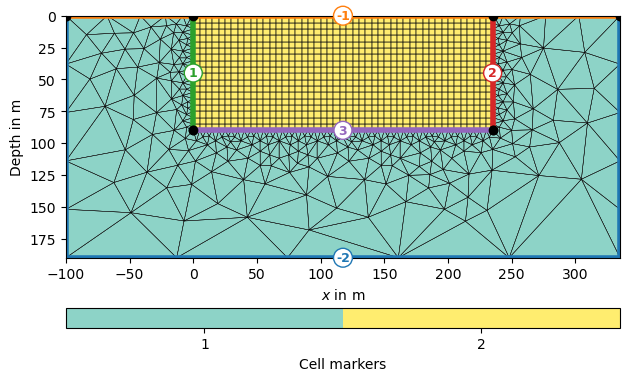

In [13]:
x = np.arange(0, 236, 5)


y = -pg.cat([0], pg.utils.grange(0.5, 90, n=19))[::-1] 


inversionDomain = pg.createGrid(x=x, y=y, marker=2)

grid = pg.meshtools.appendTriangleBoundary(inversionDomain, marker=1,
                                           xbound=100, ybound=100)
pg.show(grid, markers=True, showMesh=True)

24/02/25 - 10:57:25 - pyGIMLi - INFO - Data error estimate (min:max)  0.05000226148430927 : 0.05010411458341139


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x21f2a42fb10>)

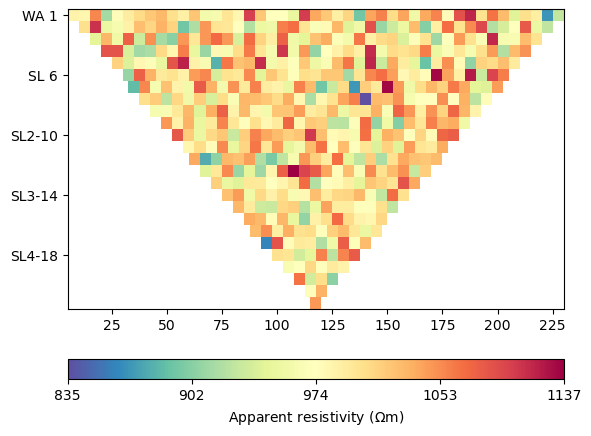

In [28]:
res = 1000.0
hom = ert.simulate(mesh_hom, res=1000.0, scheme=shm, noiseLevel= 0.05,
                    verbose=True, sr=False)
ert.showData(hom)

24/02/25 - 10:57:29 - pyGIMLi - INFO - Found 2 regions.
24/02/25 - 10:57:29 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/02/25 - 10:57:29 - pyGIMLi - INFO - Creating forward mesh from region infos.
24/02/25 - 10:57:29 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
24/02/25 - 10:57:29 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 4791 Cells: 5860 Boundaries: 5362
24/02/25 - 10:57:29 - pyGIMLi - INFO - Use median(data values)=999.9529330453412
24/02/25 - 10:57:29 - pyGIMLi - INFO - Created startmodel from forward operator: 893, min/max=999.952933/999.952933
24/02/25 - 10:57:29 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021F2AC30BD0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000021F2A529C60>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x0000021F29AC1850>
min/max (data): 835/1137
min/max (error): 5%/5.01%
min/max (start model): 1000/1000
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   24.79
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    2.33 (dPhi = 87.45%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    2.33 (dPhi = 2.83%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    2.34 (dPhi = 0.01%) lam: 50.0
################################################################################
#                Abort criterion reached: dPhi = 0.01 (< 2.0%)          

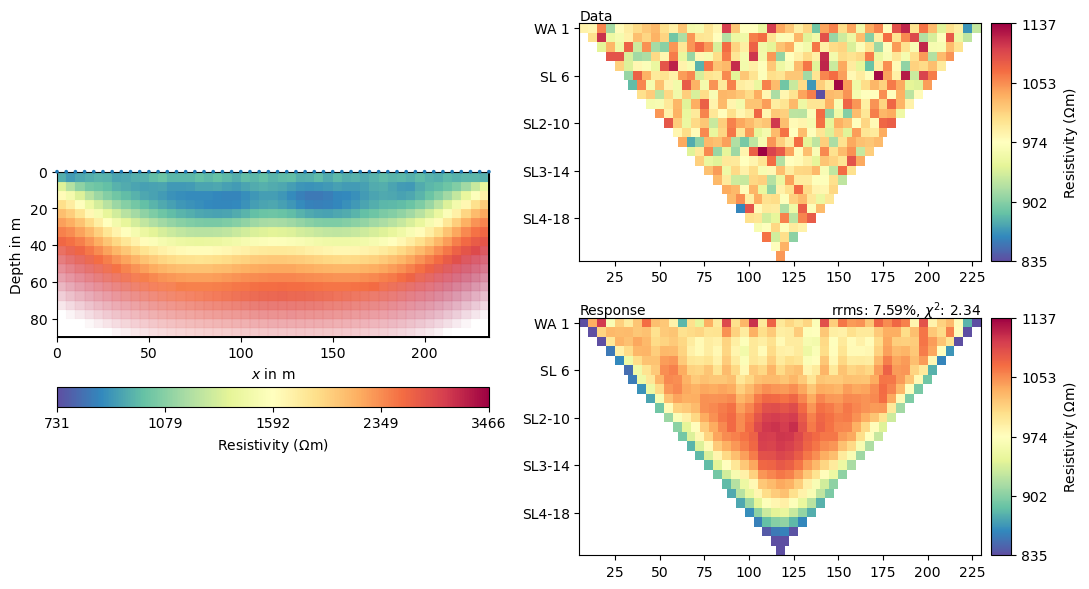

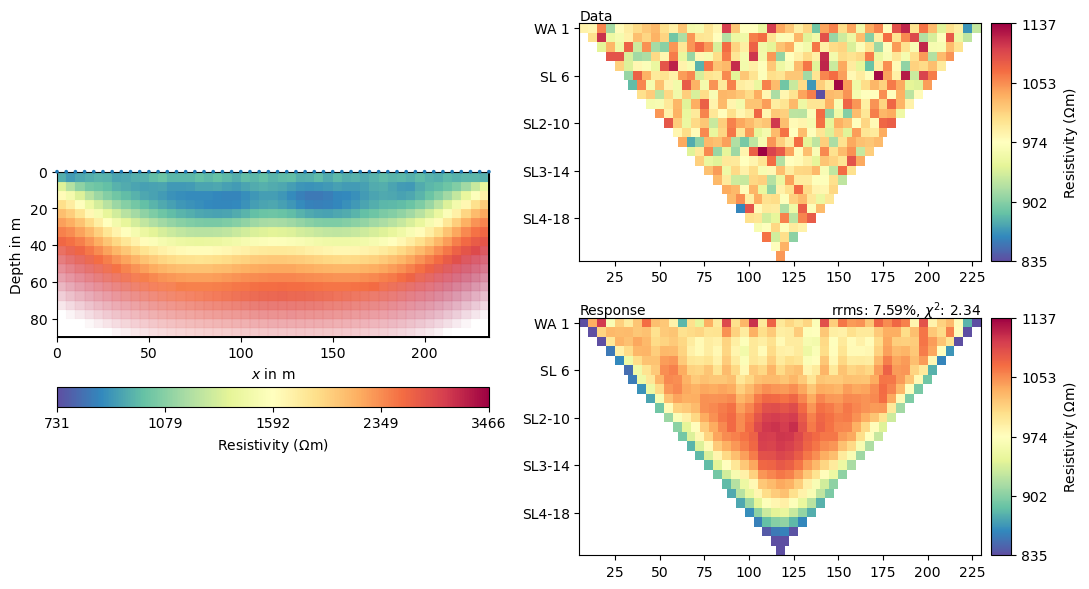

In [29]:
mesh = mt.createParaMesh2DGrid(hom)
mgr = ert.ERTManager(hom)
model = mgr.invert(hom, mesh=grid, lam=50, verbose=True)
mgr.showResultAndFit()

24/02/25 - 10:59:19 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_3d_hom\ERTManager


Path //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_3d_hom\ERTManager already exists. Skipping


('//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_3d_hom\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

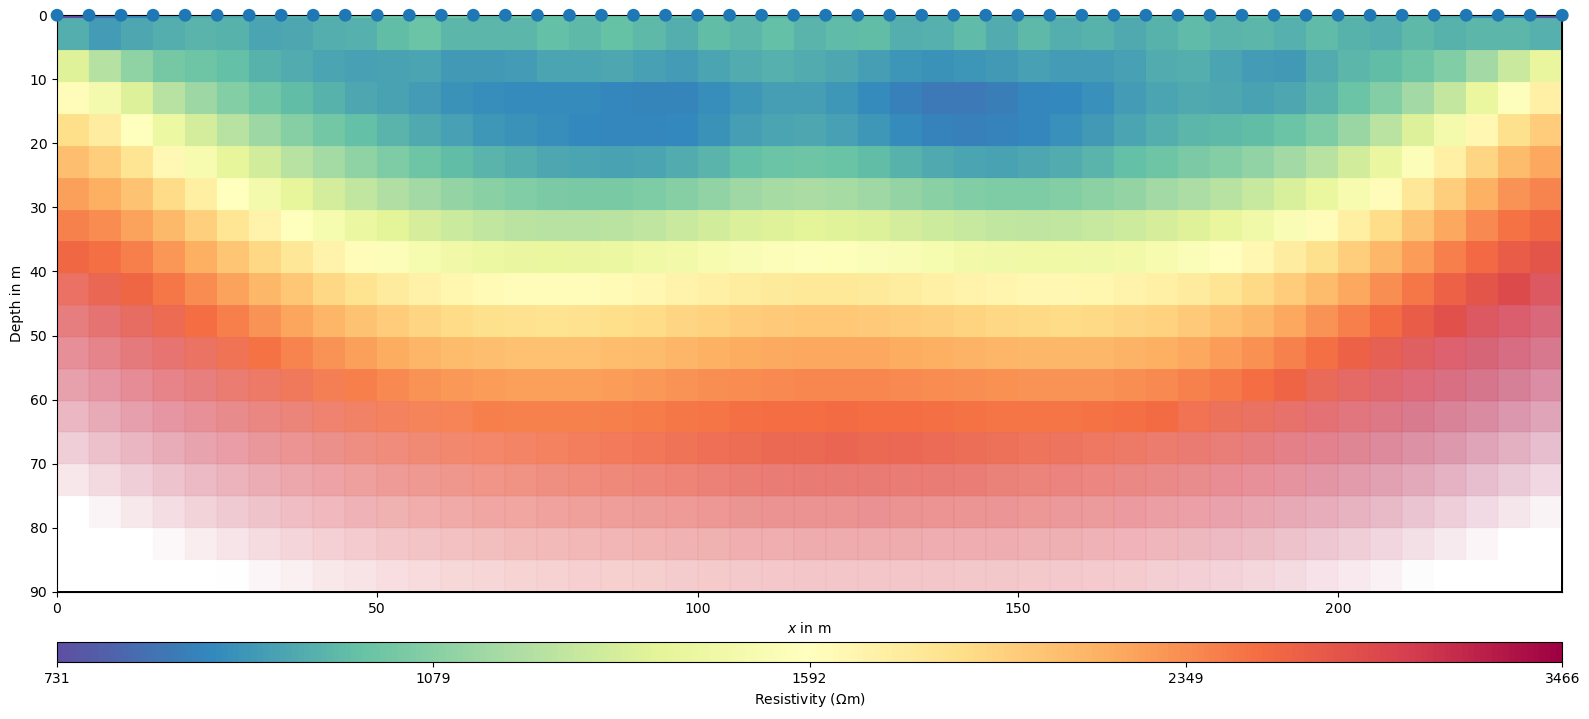

In [31]:
mgr.saveResult(dir+ 'pygimli/all_inversions/INV_3d_hom')

24/02/25 - 10:59:52 - pyGIMLi - INFO - Data error estimate (min:max)  0.05000227626365198 : 0.052632482089625114


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x21f2ed8cad0>)

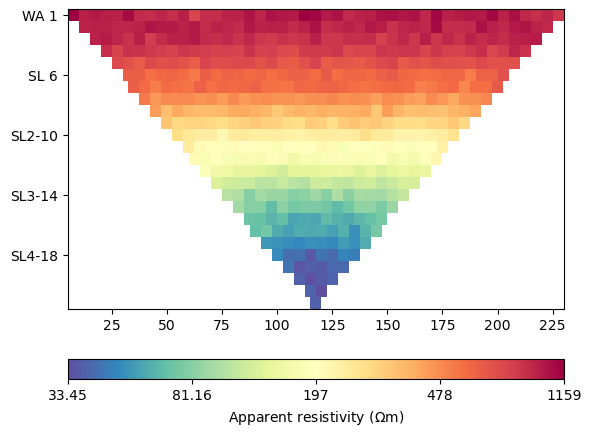

In [32]:
res_air = [[1, 1000.0], [2, 1.0]]

air_wide = ert.simulate(mesh_air_wide, res=res_air, scheme=shm, noiseLevel=0.05,
                    verbose=True, sr=False)

ert.showData(air_wide)

24/02/25 - 11:00:04 - pyGIMLi - INFO - Found 2 regions.
24/02/25 - 11:00:04 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/02/25 - 11:00:04 - pyGIMLi - INFO - Creating forward mesh from region infos.
24/02/25 - 11:00:04 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
24/02/25 - 11:00:04 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 4791 Cells: 5860 Boundaries: 5362
24/02/25 - 11:00:04 - pyGIMLi - INFO - Use median(data values)=483.1165488532485
24/02/25 - 11:00:04 - pyGIMLi - INFO - Created startmodel from forward operator: 893, min/max=483.116549/483.116549
24/02/25 - 11:00:04 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021F2EE0E930>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000021F2ED752B0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x0000021F2ED76A70>
min/max (data): 33.45/1159
min/max (error): 5%/5.26%
min/max (start model): 483/483
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  256.87
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   13.64 (dPhi = 91.38%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    8.70 (dPhi = 32.28%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    6.28 (dPhi = 24.31%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    3.72 (dPhi = 20.02%) lam: 50.0
--------------

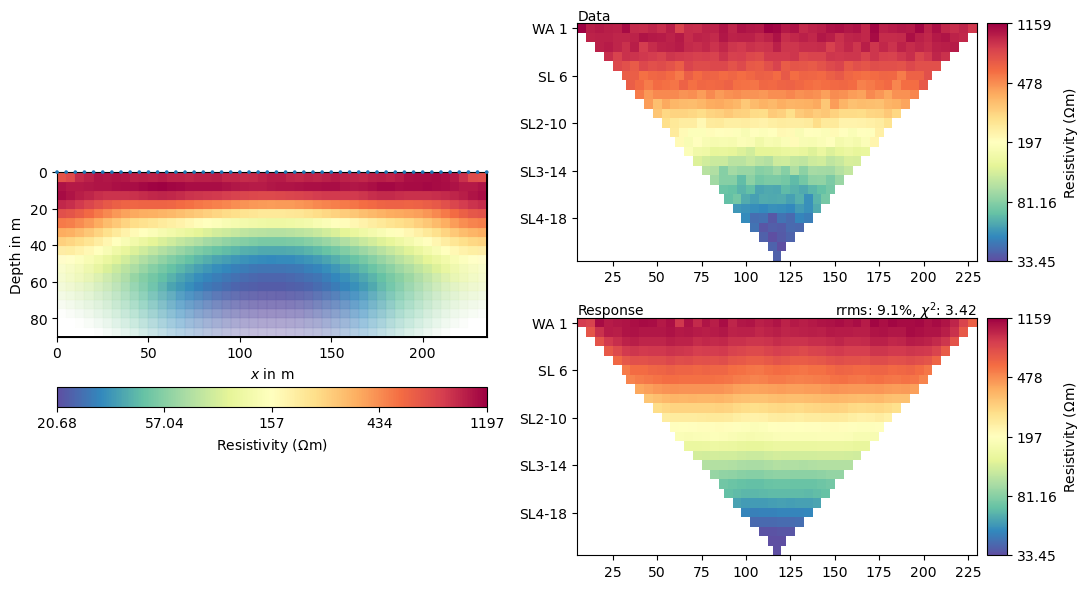

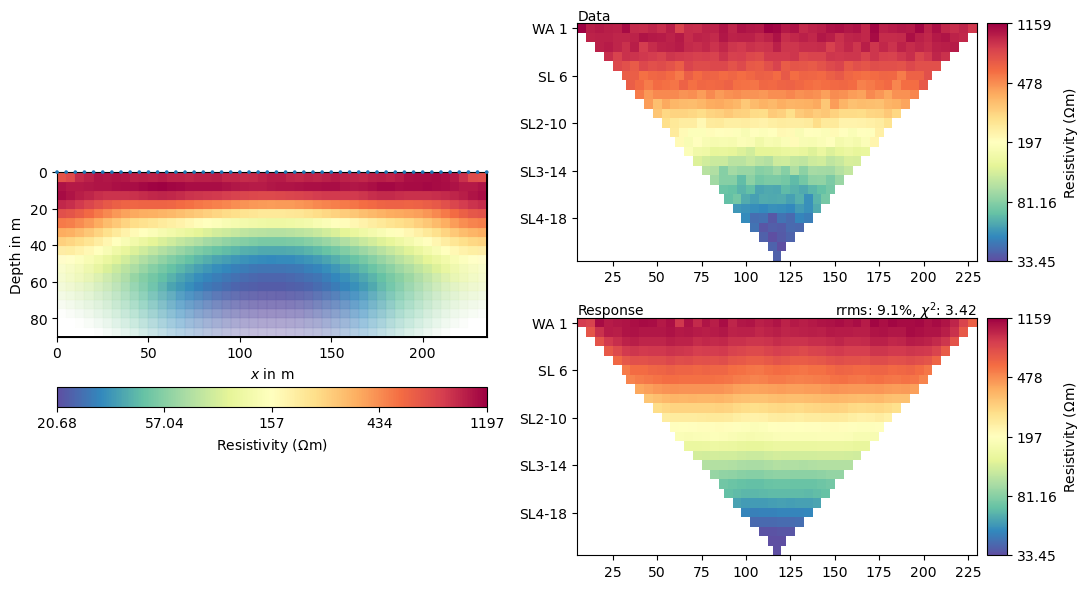

In [33]:
mesh = mt.createParaMesh2DGrid(air_wide)
mgr = ert.ERTManager(air_wide)
model_wide = mgr.invert(air_wide, mesh=grid, lam=50, verbose=True)
mgr.showResultAndFit()

24/02/25 - 11:01:05 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_3d_air_wide\ERTManager


Path //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_3d_air_wide\ERTManager already exists. Skipping


('//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_3d_air_wide\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

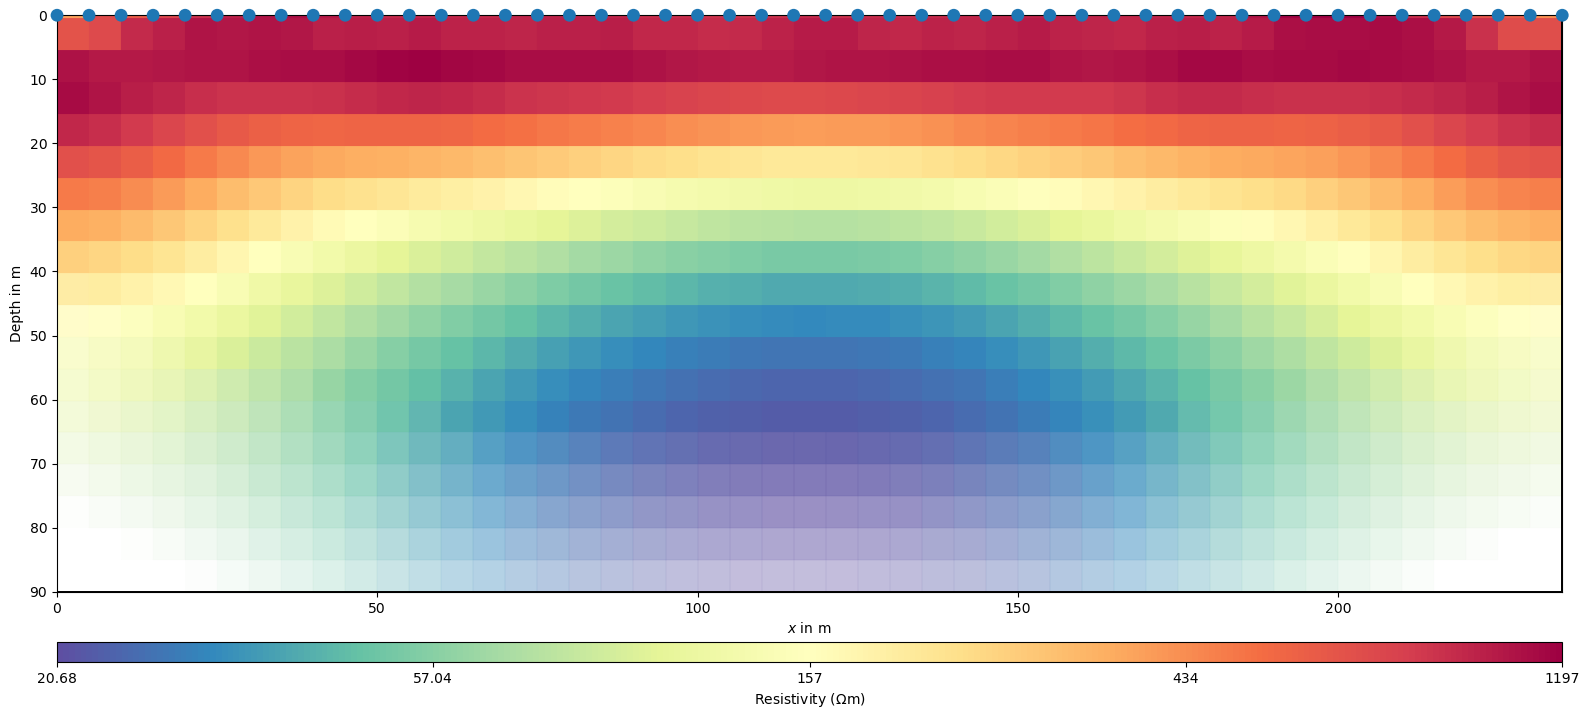

In [34]:
mgr.saveResult(dir+ 'pygimli/all_inversions/INV_3d_air_wide')

24/02/25 - 11:01:17 - pyGIMLi - INFO - Data error estimate (min:max)  0.050002314680252416 : 0.05019409168532417
24/02/25 - 11:01:17 - pyGIMLi - INFO - 1.1901370566270495 20840.35620149403


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x21f2f366a10>)

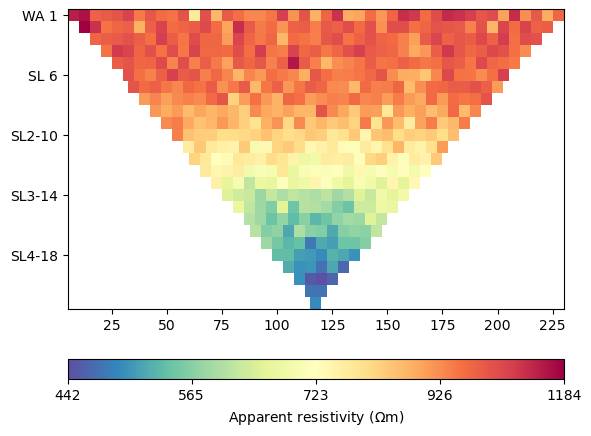

In [35]:
res_air = [[1, 1000.0], [2, 10.0]]

air_mid = ert.simulate(mesh_air_mid, res=res_air, scheme=shm, noiseLevel=0.05,
                    verbose=True, sr=False)

pg.info(np.linalg.norm(air_mid['err']), np.linalg.norm(air_mid['rhoa']))
ert.showData(air_mid)

24/02/25 - 11:01:22 - pyGIMLi - INFO - Found 2 regions.
24/02/25 - 11:01:22 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/02/25 - 11:01:22 - pyGIMLi - INFO - Creating forward mesh from region infos.
24/02/25 - 11:01:23 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
24/02/25 - 11:01:23 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 4791 Cells: 5860 Boundaries: 5362
24/02/25 - 11:01:23 - pyGIMLi - INFO - Use median(data values)=912.5073224048434
24/02/25 - 11:01:23 - pyGIMLi - INFO - Created startmodel from forward operator: 893, min/max=912.507322/912.507322
24/02/25 - 11:01:23 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021F2EB9A660>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000021F2F477150>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x0000021F2F475FD0>
min/max (data): 442/1184
min/max (error): 5%/5.02%
min/max (start model): 913/913
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =    6.06
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    2.69 (dPhi = 52.44%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    2.27 (dPhi = 12.42%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    2.18 (dPhi = 2.02%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    2.18 (dPhi = -0.03%) lam: 50.0
#################

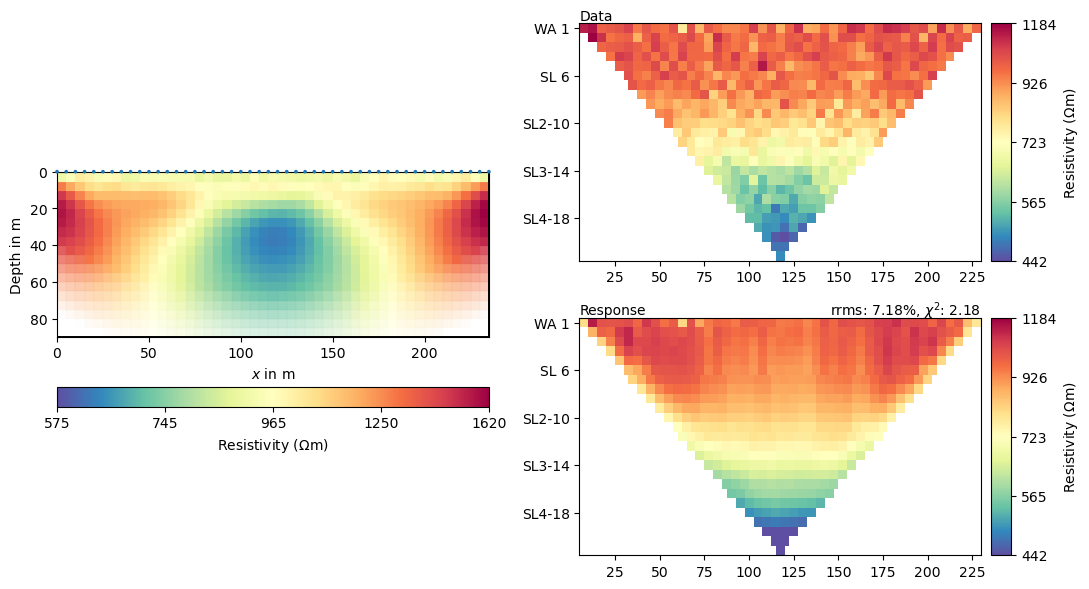

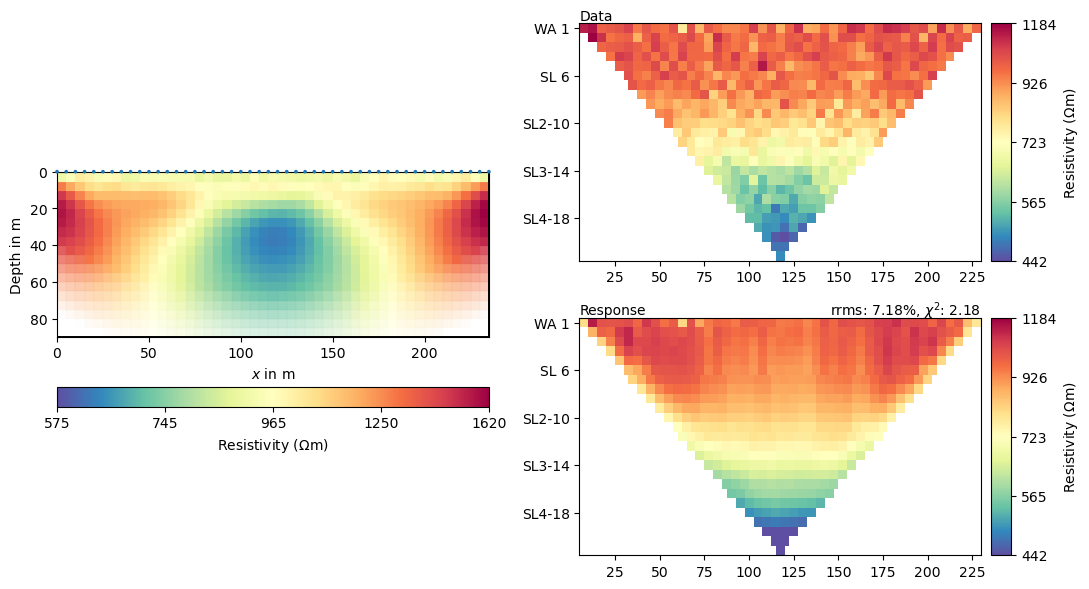

In [36]:
mesh = mt.createParaMesh2DGrid(air_mid)
mgr = ert.ERTManager(air_mid)
model_mid = mgr.invert(air_mid, mesh=grid, lam=50, verbose=True)
mgr.showResultAndFit()

24/02/25 - 10:44:27 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_3d_air_mid\ERTManager


Path //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_3d_air_mid\ERTManager already exists. Skipping


('//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_3d_air_mid\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

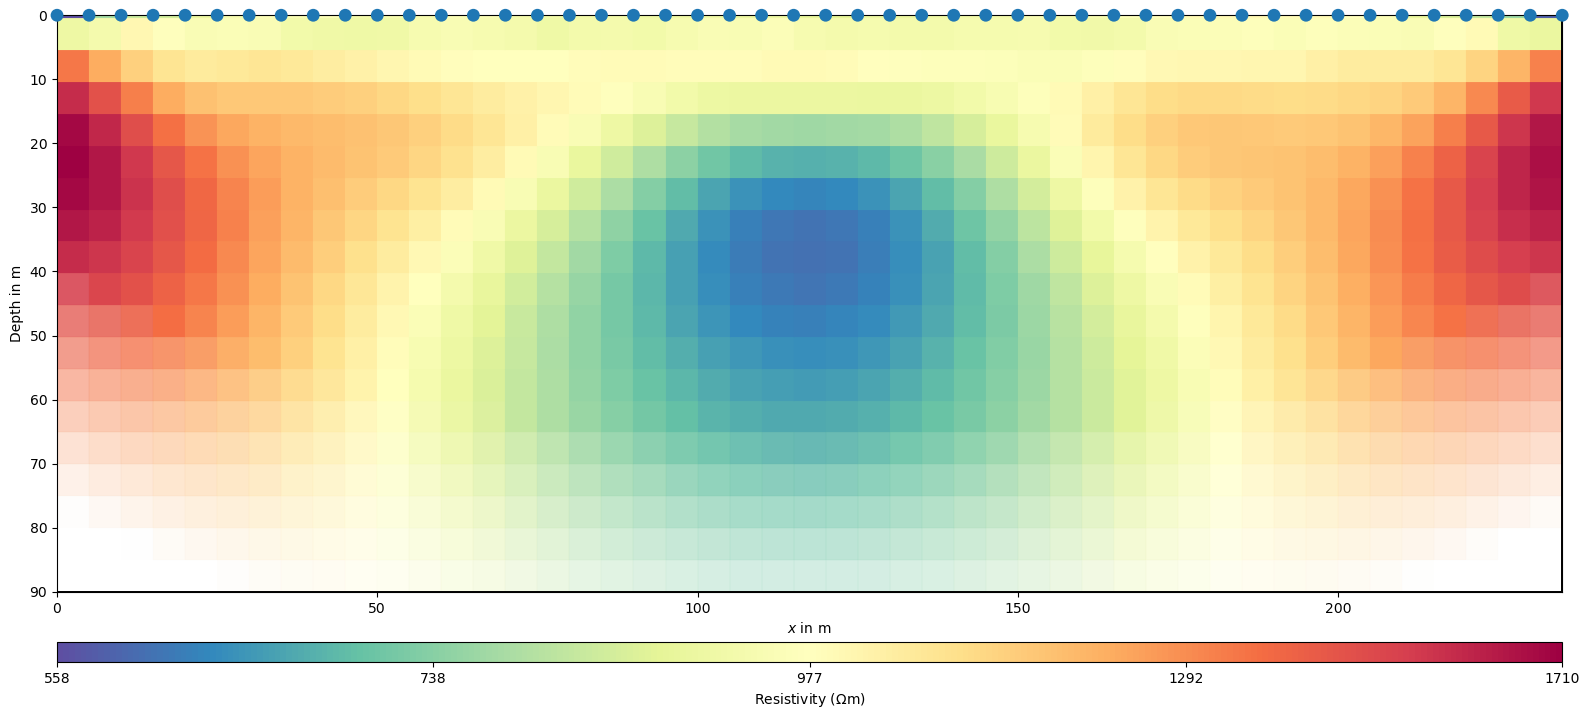

In [22]:
mgr.saveResult(dir+ 'pygimli/all_inversions/INV_3d_air_mid')

24/02/25 - 11:03:18 - pyGIMLi - INFO - Data error estimate (min:max)  0.05000204762307902 : 0.050117930887377315


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x21f31db2ad0>)

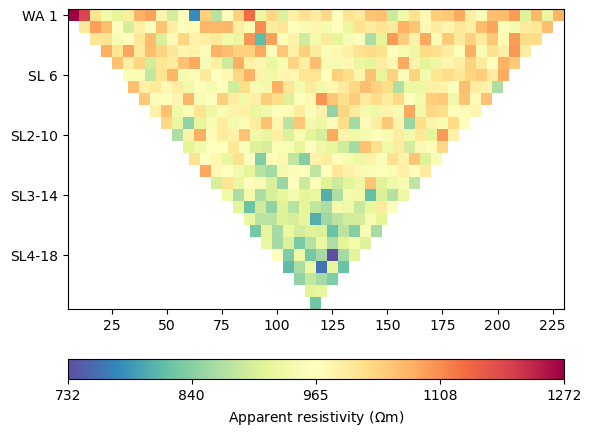

In [37]:
res_air = [[1, 1000.0], [2, 10.0]]

air_thin = ert.simulate(mesh_air_thin, res=res_air, scheme=shm, noiseLevel=0.05,
                    verbose=True, sr=False)

ert.showData(air_thin)

24/02/25 - 11:03:29 - pyGIMLi - INFO - Found 2 regions.
24/02/25 - 11:03:29 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
24/02/25 - 11:03:29 - pyGIMLi - INFO - Creating forward mesh from region infos.
24/02/25 - 11:03:29 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
24/02/25 - 11:03:30 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 4791 Cells: 5860 Boundaries: 5362
24/02/25 - 11:03:30 - pyGIMLi - INFO - Use median(data values)=970.8403818500856
24/02/25 - 11:03:30 - pyGIMLi - INFO - Created startmodel from forward operator: 893, min/max=970.840382/970.840382
24/02/25 - 11:03:30 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021F31CC7CE0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000021F31D8BF10>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x0000021F31D5E110>
min/max (data): 732/1272
min/max (error): 5%/5.01%
min/max (start model): 971/971
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   19.77
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    2.39 (dPhi = 85.26%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    2.39 (dPhi = 2.59%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    2.39 (dPhi = 0.03%) lam: 50.0
################################################################################
#                Abort criterion reached: dPhi = 0.03 (< 2.0%)            

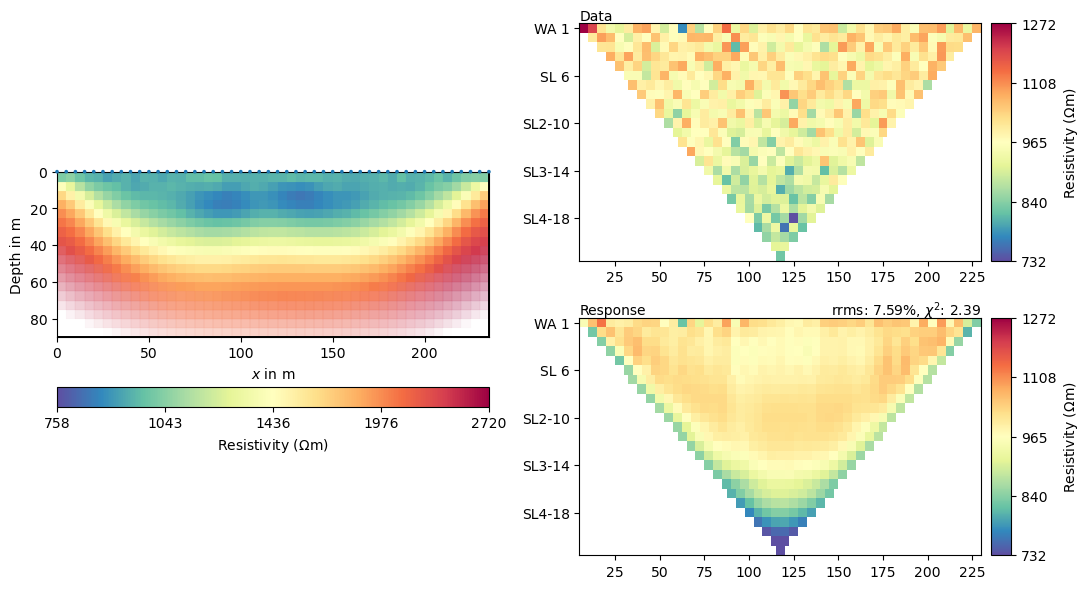

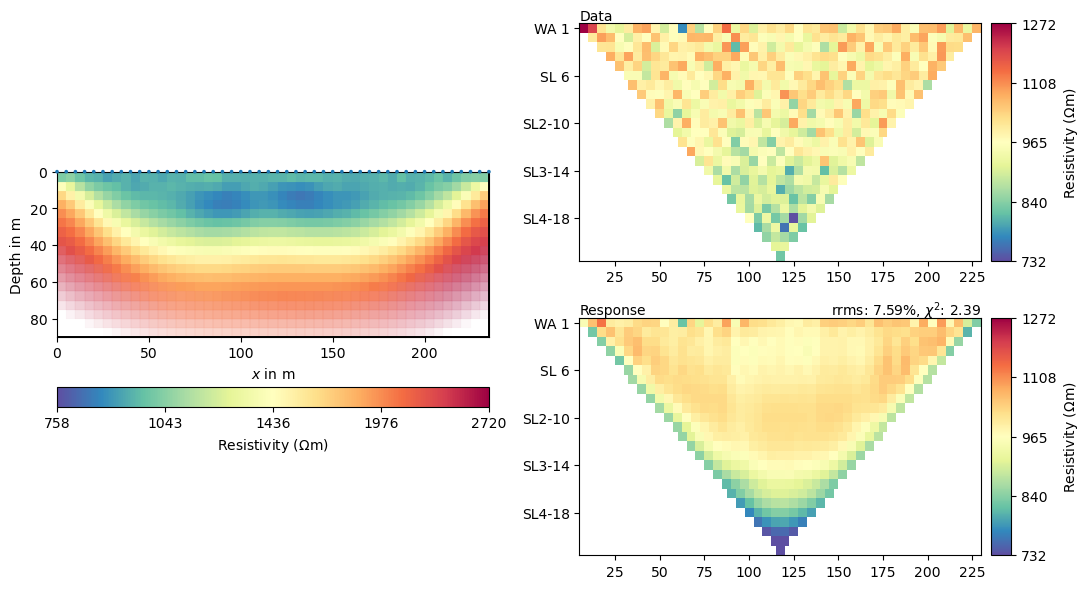

In [38]:
mesh = mt.createParaMesh2DGrid(air_thin)
mgr = ert.ERTManager(air_thin)
model_thin = mgr.invert(air_thin, mesh=grid, lam=50, verbose=True)
mgr.showResultAndFit()

24/02/25 - 11:04:22 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_3d_air_thin\ERTManager


Path //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_3d_air_thin\ERTManager already exists. Skipping


('//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_3d_air_thin\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

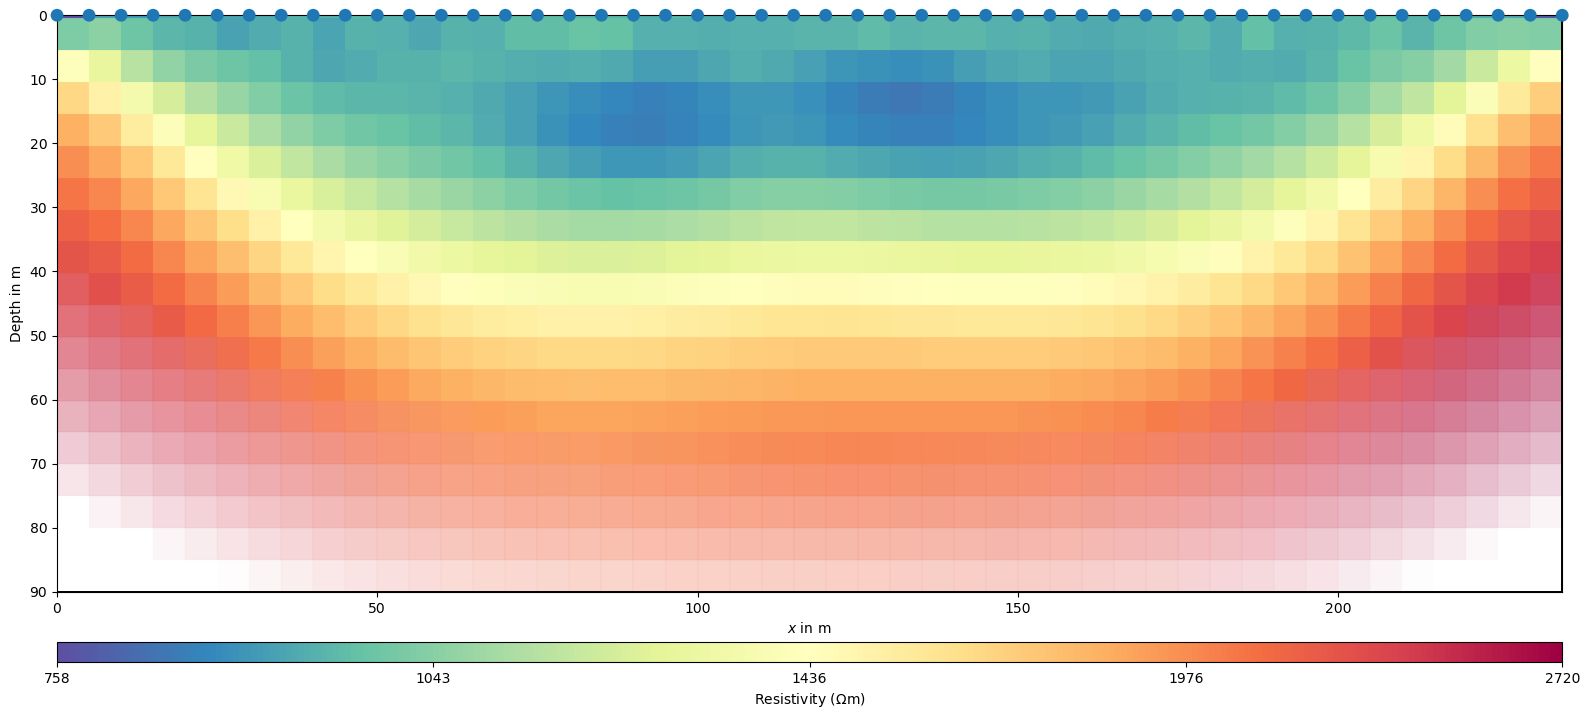

In [39]:

mgr.saveResult(dir+ 'pygimli/all_inversions/INV_3d_air_thin')